# MLP con Early Stopping y Dropout

## 1. Exploración y preprocesamiento de datos:

Cargamos los datos

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
ds_path = "archive/HeartDiseaseTrain-Test.csv"
df = pd.read_csv(ds_path)


Visualizamos la cabecera

In [3]:
df.head(10)

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
5,58,Female,Typical angina,100,248,Lower than 120 mg/ml,Normal,122,No,1.0,Flat,Zero,Fixed Defect,1
6,58,Male,Typical angina,114,318,Lower than 120 mg/ml,Left ventricular hypertrophy,140,No,4.4,Upsloping,Three,Normal,0
7,55,Male,Typical angina,160,289,Lower than 120 mg/ml,Normal,145,Yes,0.8,Flat,One,Reversable Defect,0
8,46,Male,Typical angina,120,249,Lower than 120 mg/ml,Normal,144,No,0.8,Downsloping,Zero,Reversable Defect,0
9,54,Male,Typical angina,122,286,Lower than 120 mg/ml,Normal,116,Yes,3.2,Flat,Two,Fixed Defect,0


Exploramos los datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

Observamos los valores unicos de las variables categóricas

In [5]:
from utils.eda import get_categoric_columns
categoric_columns = get_categoric_columns(df)
for i in categoric_columns:
    print(i)
    print(df[i].unique())

sex
['Male' 'Female']
chest_pain_type
['Typical angina' 'Atypical angina' 'Non-anginal pain' 'Asymptomatic']
fasting_blood_sugar
['Lower than 120 mg/ml' 'Greater than 120 mg/ml']
rest_ecg
['ST-T wave abnormality' 'Normal' 'Left ventricular hypertrophy']
exercise_induced_angina
['No' 'Yes']
slope
['Downsloping' 'Upsloping' 'Flat']
vessels_colored_by_flourosopy
['Two' 'Zero' 'One' 'Three' 'Four']
thalassemia
['Reversable Defect' 'Fixed Defect' 'Normal' 'No']


Continuamos con la exploración de los datos

Visualizamos las últimas entradas

In [6]:
df.tail(10)

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
1015,58,Male,Typical angina,128,216,Lower than 120 mg/ml,Normal,131,Yes,2.2,Flat,Three,Reversable Defect,0
1016,65,Male,Asymptomatic,138,282,Greater than 120 mg/ml,Normal,174,No,1.4,Flat,One,Fixed Defect,0
1017,53,Male,Typical angina,123,282,Lower than 120 mg/ml,ST-T wave abnormality,95,Yes,2.0,Flat,Two,Reversable Defect,0
1018,41,Male,Typical angina,110,172,Lower than 120 mg/ml,Normal,158,No,0.0,Downsloping,Zero,Reversable Defect,0
1019,47,Male,Typical angina,112,204,Lower than 120 mg/ml,ST-T wave abnormality,143,No,0.1,Downsloping,Zero,Fixed Defect,1
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1
1024,54,Male,Typical angina,120,188,Lower than 120 mg/ml,ST-T wave abnormality,113,No,1.4,Flat,One,Reversable Defect,0


Verificamos los valores descriptivos

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
resting_blood_pressure,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
cholestoral,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
Max_heart_rate,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2
target,1025.0,0.513171,0.500070,0.0,0.0,1.0,1.0,1.0


Continuamos con el analisis

In [8]:
df.describe(include='object').T

,count,unique,top,freq
sex,1025,2,Male,713
chest_pain_type,1025,4,Typical angina,497
fasting_blood_sugar,1025,2,Lower than 120 mg/ml,872
rest_ecg,1025,3,ST-T wave abnormality,513
exercise_induced_angina,1025,2,No,680
slope,1025,3,Flat,482
vessels_colored_by_flourosopy,1025,5,Zero,578
thalassemia,1025,4,Fixed Defect,544


### Identificación de valores nulos, duplicados y outliers

In [9]:
duplicated = df.duplicated().sum()
print(f"Registros duplicados en df: {duplicated}")

Registros duplicados en df: 723


Eliminamos valores duplicados

In [10]:
df = df.drop_duplicates()
duplicated = df.duplicated().sum()
print(f"Registros duplicados en df: {duplicated}")

Registros duplicados en df: 0


No se observan valores duplicados

Ahora buscamos valores nulos

In [11]:
from utils.eda import get_nulll_data_info
get_nulll_data_info(df)

,datos sin NAs en q,Na en q,Na en %
age,302,0,0.0
sex,302,0,0.0
chest_pain_type,302,0,0.0
resting_blood_pressure,302,0,0.0
cholestoral,302,0,0.0
fasting_blood_sugar,302,0,0.0
rest_ecg,302,0,0.0
Max_heart_rate,302,0,0.0
exercise_induced_angina,302,0,0.0
oldpeak,302,0,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            302 non-null    int64  
 1   sex                            302 non-null    object 
 2   chest_pain_type                302 non-null    object 
 3   resting_blood_pressure         302 non-null    int64  
 4   cholestoral                    302 non-null    int64  
 5   fasting_blood_sugar            302 non-null    object 
 6   rest_ecg                       302 non-null    object 
 7   Max_heart_rate                 302 non-null    int64  
 8   exercise_induced_angina        302 non-null    object 
 9   oldpeak                        302 non-null    float64
 10  slope                          302 non-null    object 
 11  vessels_colored_by_flourosopy  302 non-null    object 
 12  thalassemia                    302 non-null    object 


Generamos un grafico con la distribucion de nuestra variable objetivo

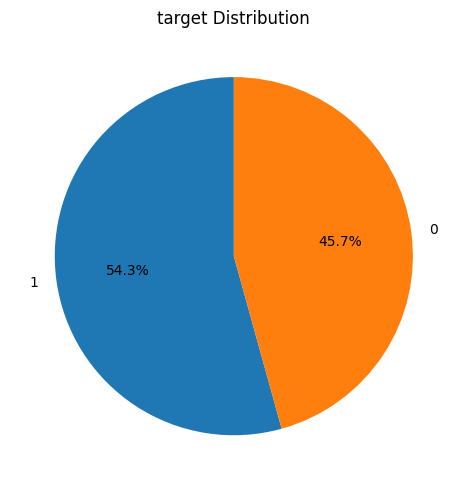

In [13]:
from utils.eda import graph_pie
column_names=["target",]
graph_pie(df, column_names, figsize=(5,5), num_columns=1)

Se observan datos balanceados

Convertimos a booleano, 0 = False, 1 = True

In [14]:
def _convertir_diganosis(x):
    return x == 1



df["target"] = df["target"].apply(_convertir_diganosis).astype("boolean")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            302 non-null    int64  
 1   sex                            302 non-null    object 
 2   chest_pain_type                302 non-null    object 
 3   resting_blood_pressure         302 non-null    int64  
 4   cholestoral                    302 non-null    int64  
 5   fasting_blood_sugar            302 non-null    object 
 6   rest_ecg                       302 non-null    object 
 7   Max_heart_rate                 302 non-null    int64  
 8   exercise_induced_angina        302 non-null    object 
 9   oldpeak                        302 non-null    float64
 10  slope                          302 non-null    object 
 11  vessels_colored_by_flourosopy  302 non-null    object 
 12  thalassemia                    302 non-null    object 


In [16]:
object_column = df.select_dtypes(include=["object", "string"]).columns.tolist()

for columna in object_column:
    valores_unicos = df[columna].dropna().unique().tolist()
    print(f"Valores únicos para columna '{columna}': {str(valores_unicos)}")

Valores únicos para columna 'sex': ['Male', 'Female']
Valores únicos para columna 'chest_pain_type': ['Typical angina', 'Atypical angina', 'Non-anginal pain', 'Asymptomatic']
Valores únicos para columna 'fasting_blood_sugar': ['Lower than 120 mg/ml', 'Greater than 120 mg/ml']
Valores únicos para columna 'rest_ecg': ['ST-T wave abnormality', 'Normal', 'Left ventricular hypertrophy']
Valores únicos para columna 'exercise_induced_angina': ['No', 'Yes']
Valores únicos para columna 'slope': ['Downsloping', 'Upsloping', 'Flat']
Valores únicos para columna 'vessels_colored_by_flourosopy': ['Two', 'Zero', 'One', 'Three', 'Four']
Valores únicos para columna 'thalassemia': ['Reversable Defect', 'Fixed Defect', 'Normal', 'No']


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            302 non-null    int64  
 1   sex                            302 non-null    object 
 2   chest_pain_type                302 non-null    object 
 3   resting_blood_pressure         302 non-null    int64  
 4   cholestoral                    302 non-null    int64  
 5   fasting_blood_sugar            302 non-null    object 
 6   rest_ecg                       302 non-null    object 
 7   Max_heart_rate                 302 non-null    int64  
 8   exercise_induced_angina        302 non-null    object 
 9   oldpeak                        302 non-null    float64
 10  slope                          302 non-null    object 
 11  vessels_colored_by_flourosopy  302 non-null    object 
 12  thalassemia                    302 non-null    object 


Convertimos las columnas categoricas y string

In [18]:
categorical_columns = get_categoric_columns(df)
max_categorical_columns_percentage = 0.05
num_rows_df = df.shape[0]
columns_to_exclude = []
columns_converted_to_categorical = []
columns_converted_to_string = []

for column in categorical_columns:
    unique_values = df[column].dropna().unique().tolist()
    if len(unique_values) <= (max_categorical_columns_percentage * num_rows_df):

        print(f"Valores unicos en columna '{column}': {str(unique_values)}")
        print(f"Convertir '{column}' a categorical")
        df[column] = df[column].astype("category")
        columns_converted_to_categorical.append(column)
    else:
        print(f"Column '{column}' No se convierte a categorica, se conserva cómo string")
        df[column] = df[column].astype("string")
        columns_converted_to_string.append(column)

    del unique_values



Valores unicos en columna 'sex': ['Male', 'Female']
Convertir 'sex' a categorical
Valores unicos en columna 'chest_pain_type': ['Typical angina', 'Atypical angina', 'Non-anginal pain', 'Asymptomatic']
Convertir 'chest_pain_type' a categorical
Valores unicos en columna 'fasting_blood_sugar': ['Lower than 120 mg/ml', 'Greater than 120 mg/ml']
Convertir 'fasting_blood_sugar' a categorical
Valores unicos en columna 'rest_ecg': ['ST-T wave abnormality', 'Normal', 'Left ventricular hypertrophy']
Convertir 'rest_ecg' a categorical
Valores unicos en columna 'exercise_induced_angina': ['No', 'Yes']
Convertir 'exercise_induced_angina' a categorical
Valores unicos en columna 'slope': ['Downsloping', 'Upsloping', 'Flat']
Convertir 'slope' a categorical
Valores unicos en columna 'vessels_colored_by_flourosopy': ['Two', 'Zero', 'One', 'Three', 'Four']
Convertir 'vessels_colored_by_flourosopy' a categorical
Valores unicos en columna 'thalassemia': ['Reversable Defect', 'Fixed Defect', 'Normal', 'No']

Limpiamos las cadenas

In [19]:
from utils.eda import get_categoric_columns, clean_string

columnas_categoricas = get_categoric_columns(df)


for columna in columnas_categoricas:
    df[columna] = df[columna].apply(clean_string)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   age                            302 non-null    int64   
 1   sex                            302 non-null    category
 2   chest_pain_type                302 non-null    category
 3   resting_blood_pressure         302 non-null    int64   
 4   cholestoral                    302 non-null    int64   
 5   fasting_blood_sugar            302 non-null    category
 6   rest_ecg                       302 non-null    category
 7   Max_heart_rate                 302 non-null    int64   
 8   exercise_induced_angina        302 non-null    category
 9   oldpeak                        302 non-null    float64 
 10  slope                          302 non-null    category
 11  vessels_colored_by_flourosopy  302 non-null    category
 12  thalassemia                    302 non-nu

Generamos Histogramas para visualizar la distribucion

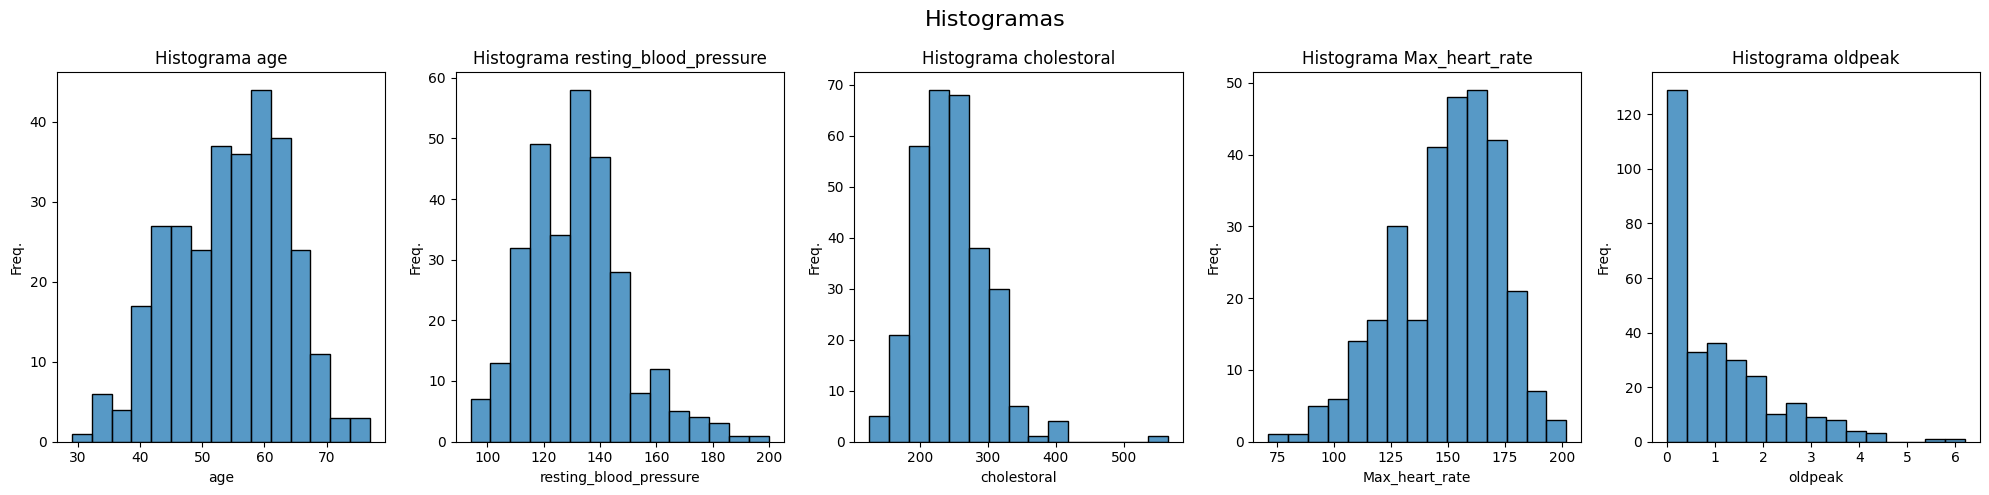

In [21]:
from utils.eda import graph_histogram, get_numeric_columns
graph_histogram(df, get_numeric_columns(df), bins=15, columns_number=5, figsize=(20, 5))

No se observa nada fuera de lo normal en los histogramas, en las columnas cholestoral y oldpeak se observan desplazamientos a la izquierda

Ahora verificamos los outliers

In [22]:
from utils.eda import get_outliers_data
get_outliers_data(df)

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak
N° Outliers,0.0,9.000000,5.000000,1.000000,5.000000
% Outliers,0.0,2.980132,1.655629,0.331126,1.655629
Lim. mix,28.5,90.000000,115.375000,84.125000,-2.400000
Lim. max,80.5,170.000000,370.375000,215.125000,4.000000


Visualizamos las gráficas de cajas de nuestras columnas

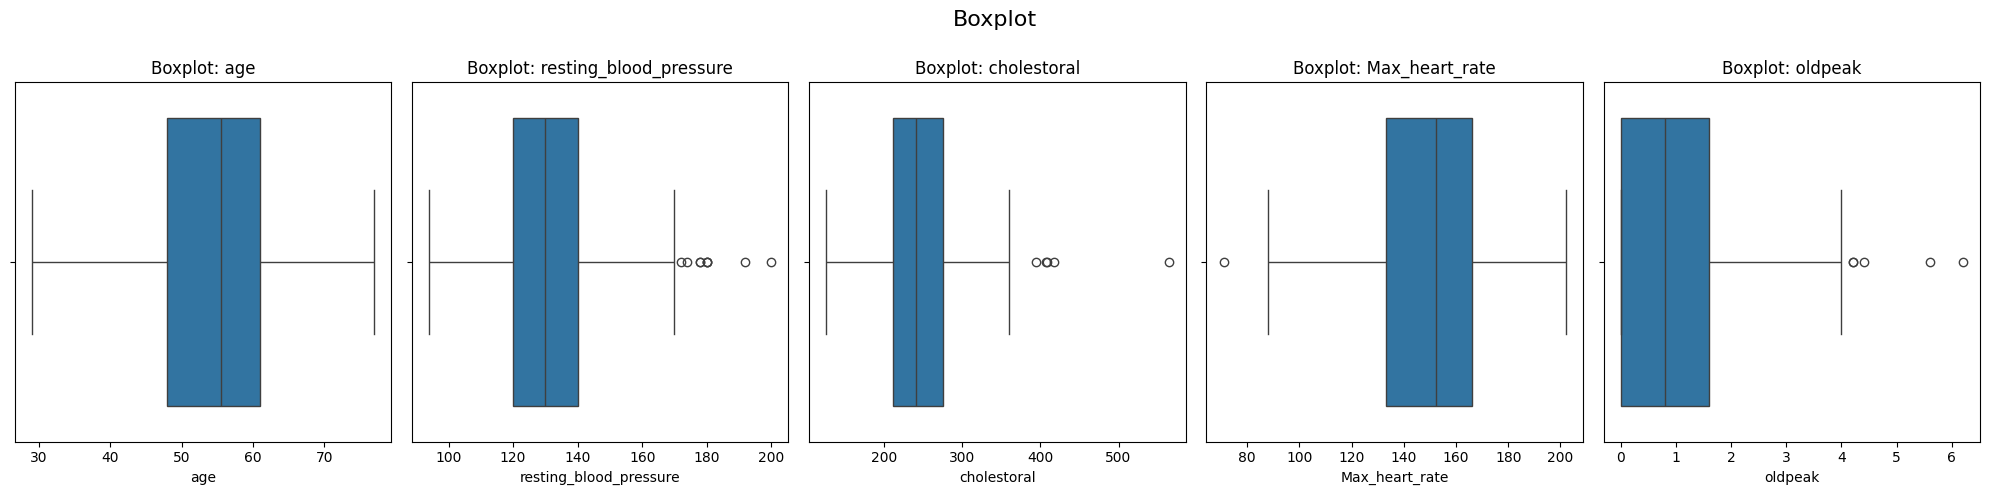

In [23]:
from utils.eda import graph_boxplot, get_numeric_columns
graph_boxplot(df, columns=get_numeric_columns(df), figsize=(20, 5), num_columns=5)

Observamos algunos outliers

Ahora veremos las caracteristicas descriptivas de las variables númericas

In [24]:
df.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


In [25]:
from utils.eda import get_descriptive_statistics
get_descriptive_statistics(df)

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak
min,29.00000,94.000000,126.000000,71.000000,0.000000
max,77.00000,200.000000,564.000000,202.000000,6.200000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
median,55.50000,130.000000,240.500000,152.500000,0.800000
variation_coefficient,0.16626,0.133458,0.209953,0.153130,1.113519


Veremos las correlaciones entre las caracteristicas

In [26]:
from utils.eda import get_numeric_columns
numeric_columns = get_numeric_columns(df)
corr_matrix = df[numeric_columns].corr(method="pearson")
spearmann = df[numeric_columns].corr(method="spearman")
kendall = df[numeric_columns].corr(method="kendall")
corr_matrix

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak
age,1.000000,0.283121,0.207216,-0.395235,0.206040
resting_blood_pressure,0.283121,1.000000,0.125256,-0.048023,0.194600
cholestoral,0.207216,0.125256,1.000000,-0.005308,0.050086
Max_heart_rate,-0.395235,-0.048023,-0.005308,1.000000,-0.342201
oldpeak,0.206040,0.194600,0.050086,-0.342201,1.000000


Ahora graficamos el mapa de calor de las correlaciones

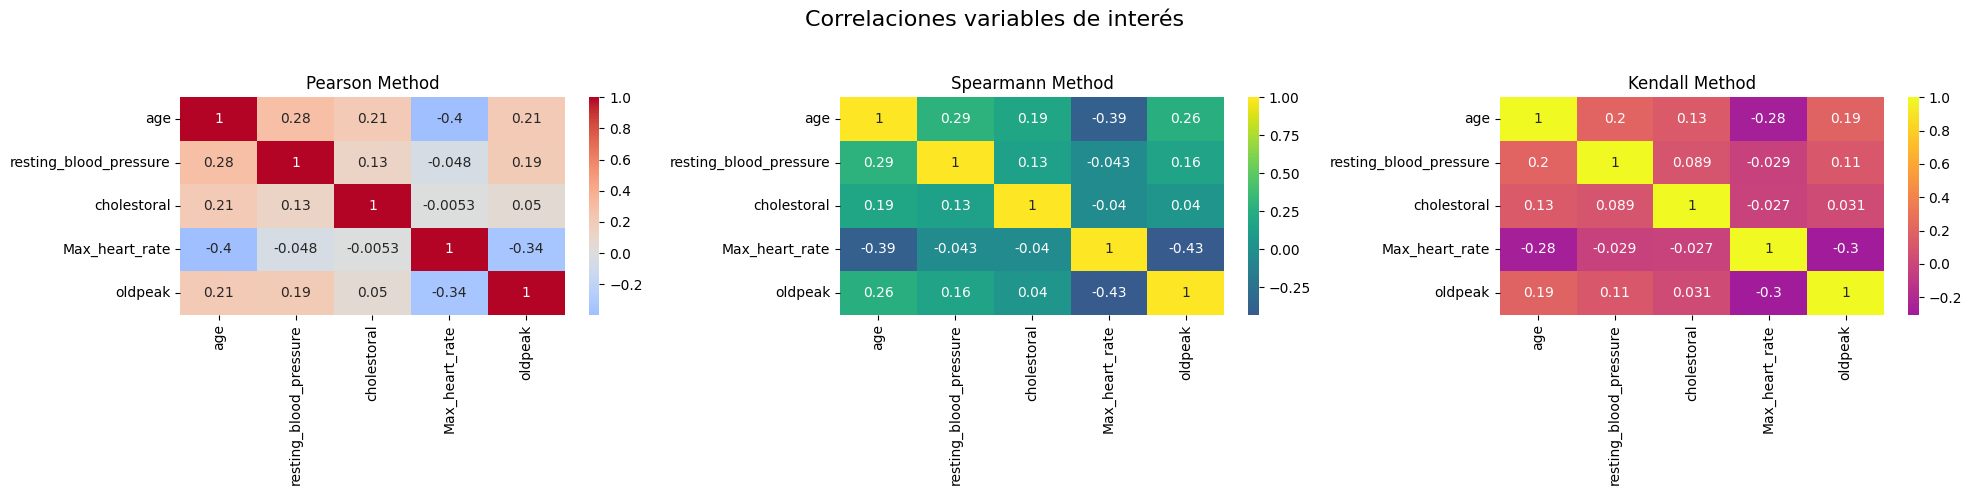

In [27]:
from utils.eda import graph_correlations
graph_correlations(corr_matrix, spearmann, kendall, "Correlaciones variables de interés", figsize= (20,5), num_columns=3)

Vemos que existen muchas correlaciones importantes

### Preparamos los datos para el entrenamiento

In [28]:
predict_columns = df.columns.tolist()
predict_columns.remove("target")
X = df[predict_columns]
y = df["target"].apply(lambda x: 1.0 if x else 0.0)

In [29]:
import matplotlib.pyplot as plt
from utils.eda import graph_confusion_matrixes
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler



Separamos en set de entrenamiento 80% y test 20%

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

In [31]:
ordinal_columns = [
    "vessels_colored_by_flourosopy",
]

ordinal_column_mapped = [
    {
        "col": "vessels_colored_by_flourosopy",
        "mapping": [
            "zero",
            "one",
            "two",
            "three",
            "four",
        ]
    },
]

Preparamos los preprocesadores

In [32]:
categories_ordinal_encoder = []
columns_ordinal_encoder = []

for column_mapping in ordinal_column_mapped:
    column_name = column_mapping["col"]

    if column_name in predict_columns:
        column_mappings = column_mapping["mapping"]

        categories_ordinal_encoder.append(column_mappings)
        columns_ordinal_encoder.append(column_name)

categorical_columns = get_categoric_columns(df)

categorical_columns_to_onehot = []

for column in categorical_columns:
    if column not in columns_ordinal_encoder and column in predict_columns:
        categorical_columns_to_onehot.append(column)

numeric_columns = get_numeric_columns(df)

numeric_columns_to_scale = []

for column in numeric_columns:
    if column in predict_columns:
        numeric_columns_to_scale.append(column)

preprocessor = ColumnTransformer(
    transformers=[
        (
            "scaler",
            StandardScaler(),
            numeric_columns_to_scale,
        ),
        (
            "ordinal",
            OrdinalEncoder(categories=categories_ordinal_encoder),
            columns_ordinal_encoder,
        ),
        (
            "onehot",
            OneHotEncoder(handle_unknown='ignore', sparse_output=False),
            categorical_columns_to_onehot,
        ),
    ],
    remainder="passthrough"
)


In [34]:
get_nulll_data_info(df_transf)


,datos sin NAs en q,Na en q,Na en %
scaler__age,302,0,0.0
scaler__resting_blood_pressure,302,0,0.0
onehot__thalassemia_normal,302,0,0.0
onehot__thalassemia_no,302,0,0.0
onehot__thalassemia_fixed defect,302,0,0.0
onehot__slope_upsloping,302,0,0.0
onehot__slope_flat,302,0,0.0
onehot__slope_downsloping,302,0,0.0
onehot__exercise_induced_angina_yes,302,0,0.0
onehot__exercise_induced_angina_no,302,0,0.0


Aplicamos los preprocesadores

In [35]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [36]:
X_train_processed.shape

(241, 26)

Definimos las capas de nuestro modelo

In [37]:
model = Sequential([
    Input(shape=(26,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           3,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,825 (54.00 KB)

 Trainable params: 13,825 (54.00 KB)

 Non-trainable params: 0 (0.00 B)

Implementamos early Stopping

In [38]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [39]:
history = model.fit(X_train_processed, y_train, epochs=100, batch_size=8, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7086 - loss: 0.6444 - val_accuracy: 0.7755 - val_loss: 0.5119
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8187 - loss: 0.4836 - val_accuracy: 0.8163 - val_loss: 0.4151
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8511 - loss: 0.4050 - val_accuracy: 0.8367 - val_loss: 0.3949
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8196 - loss: 0.3826 - val_accuracy: 0.8367 - val_loss: 0.4253
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8639 - loss: 0.3618 - val_accuracy: 0.8367 - val_loss: 0.4144
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9159 - loss: 0.2704 - val_accuracy: 0.8367 - val_loss: 0.4371
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9147 - loss: 0.2542 - val_accuracy: 0.8163 - val_loss: 0.4331
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8772 - loss: 0.2604 - val_accuracy: 0.8163 - 

Visualizamos la curva de Perdida

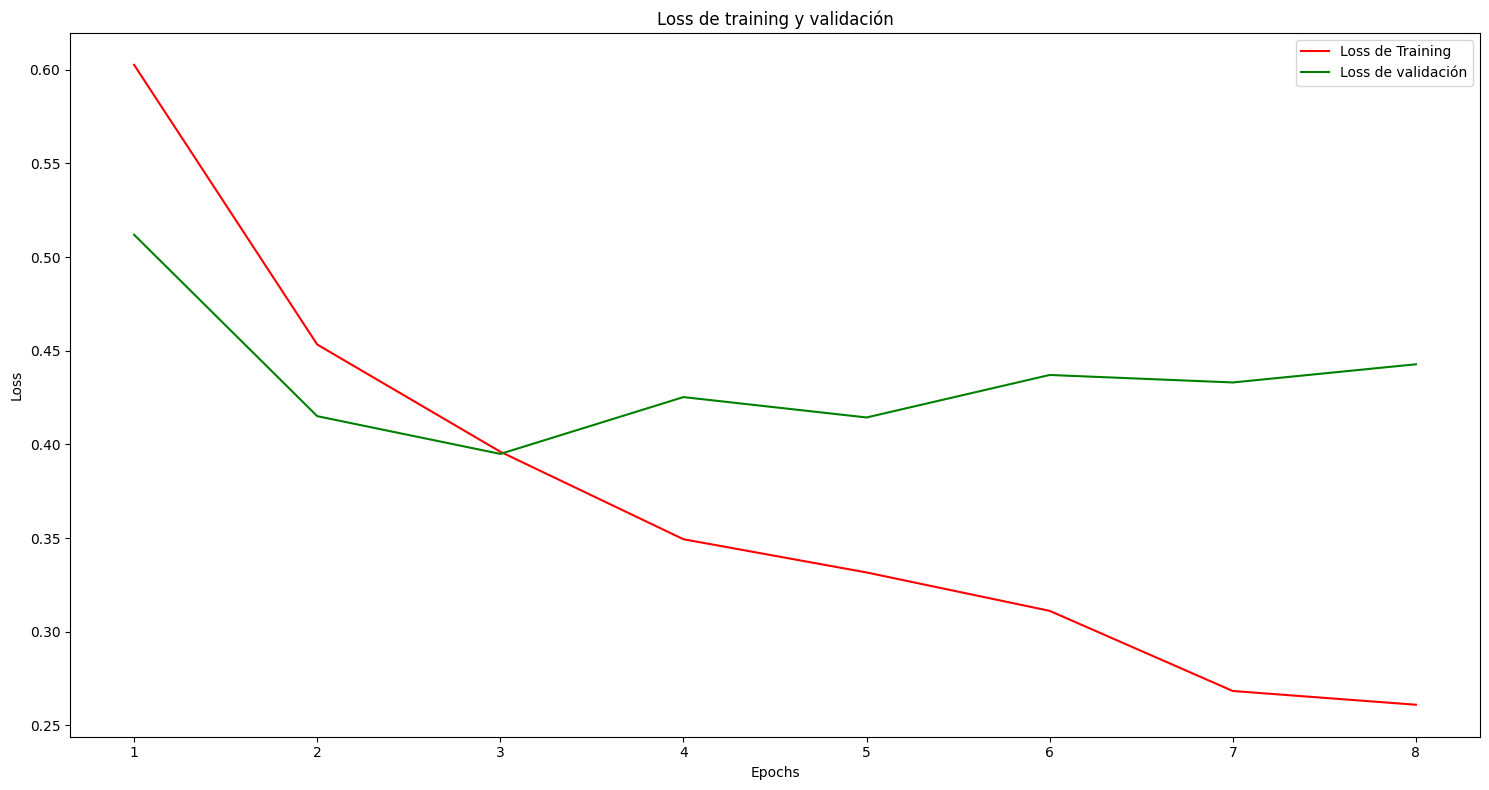

In [40]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
epochs = [i+1 for i in range(len(tr_loss))]
plt.figure(figsize= (15, 8))
plt.plot(epochs, tr_loss, 'r', label= 'Loss de Training')
plt.plot(epochs, val_loss, 'g', label= 'Loss de validación')
plt.title('Loss de training y validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Verificamos las metricas de nuestro modelo

In [41]:
y_pred_nn = model.predict(X_test_processed)
y_pred_nn_binarized = [1 if y > 0.95 else 0 for y in y_pred_nn]
accuracy_nn = accuracy_score(y_test, y_pred_nn_binarized)
precision_nn = precision_score(y_test, y_pred_nn_binarized)
recall_nn = recall_score(y_test, y_pred_nn_binarized)
f1_nn = f1_score(y_test, y_pred_nn_binarized)
roc_auc_nn = roc_auc_score(y_test, y_pred_nn)
print(f"Accuracy Neural Network: {accuracy_nn}")
print(f"Precision Neural Network: {precision_nn}")
print(f"Recall Neural Network: {recall_nn}")
print(f"F1 Neural Network: {f1_nn}")
print(f"ROC AUC Neural Network: {roc_auc_nn}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Accuracy Neural Network: 0.5737704918032787
Precision Neural Network: 1.0
Recall Neural Network: 0.10344827586206896
F1 Neural Network: 0.1875
ROC AUC Neural Network: 0.9116379310344828


Generamos un reporte

In [42]:
classification_report_nn = classification_report(y_test, y_pred_nn_binarized)
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn_binarized)
print("Reporte de Clasificación Neural Network")
print(classification_report_nn)
print("Matriz de confusión Neural Network")
print(conf_matrix_nn)

Reporte de Clasificación Neural Network
              precision    recall  f1-score   support

         0.0       0.55      1.00      0.71        32
         1.0       1.00      0.10      0.19        29

    accuracy                           0.57        61
   macro avg       0.78      0.55      0.45        61
weighted avg       0.76      0.57      0.46        61

Matriz de confusión Neural Network
[[32  0]
 [26  3]]


Graficamos la matriz confusion

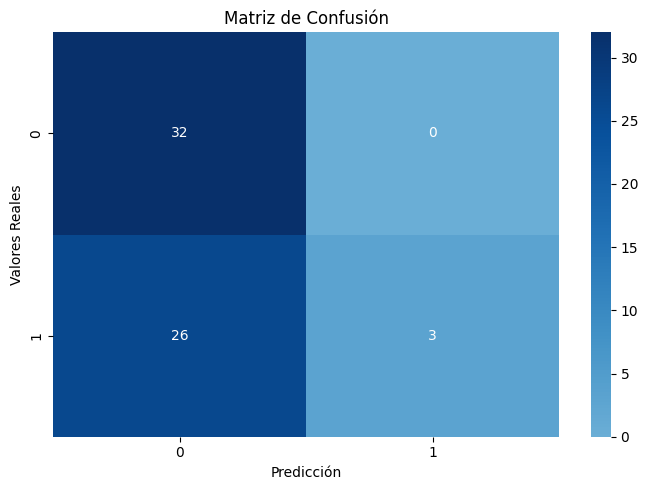

In [43]:
graph_confusion_matrixes([conf_matrix_nn,], figsize=(20, 5))

##Conclusiones

- Rendimiento general: Las métricas de evaluación como precisión, recall y F1-score no son muy altas, lo cual se puede atribuir a la gran cantidad de datos duplicados en el dataset, lo que limita la cantidad de información útil para el entrenamiento.

- Errores en la matriz de confusión: Se identificaron 7 falsos negativos en la detección de enfermedades cardíacas positivas y 6 falsos positivos. Esto indica que el modelo tiene dificultades tanto para identificar correctamente casos positivos como para evitar alarmas innecesarias.

- Conclusión inicial: Aunque este modelo de red neuronal tiene un desempeño funcional, se observa que sería necesario contar con más datos para entrenarlo de manera efectiva y mejorar su rendimiento.

**Impacto del uso de Dropout y Early Stopping**

Se realizaron experimentos comparativos utilizando y omitiendo Dropout, y se observó que incluir Dropout entre las capas mejora el rendimiento del modelo. Dropout ayuda a prevenir el sobreajuste al forzar al modelo a generalizar mejor. Esto se evidenció al comentar las capas de Dropout y notar una disminución en el desempeño del modelo.

Además, el uso de Early Stopping permitió detener el entrenamiento una vez que ya no se observaron mejoras significativas en la precisión del modelo en el conjunto de validación. Esto evitó realizar procesamiento adicional innecesario y posibles problemas de sobreajuste.

**Resumen**

En conclusión, tanto Dropout como Early Stopping han demostrado ser herramientas útiles para mejorar la generalización del modelo y optimizar los recursos de entrenamiento, en comparación con un MLP básico que carece de estas técnicas. Sin embargo, la necesidad de más datos sigue siendo un factor clave para lograr un mejor rendimiento.